# Aim
We'll be trying to predict a classification survival or deceased.
We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this notebook.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# The train data from the titanic dataset
train = pd.read_csv('titanic_train.csv')

# Data Exploration:

# A link for the dataset columns definitions.
https://www.kaggle.com/c/titanic/data

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
# Our dataset has 12 features, notice there is a huge amount of data missing in Cabin feature and only few missing in Age.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

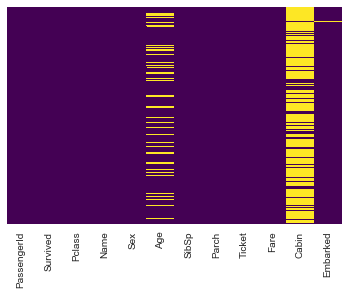

In [36]:
# First parameter shows a dataframe with true and false values of missing data.
# As u can see the yellow marks shows that these are null values.
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

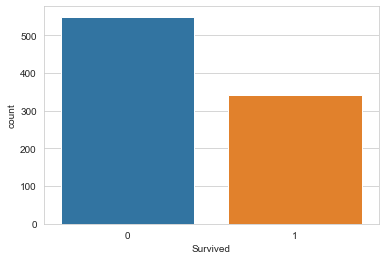

In [37]:
sns.set_style('whitegrid')
# Notice that almost 550 ppl did not survive and around 330 survived.
sns.countplot(x='Survived',data=train)

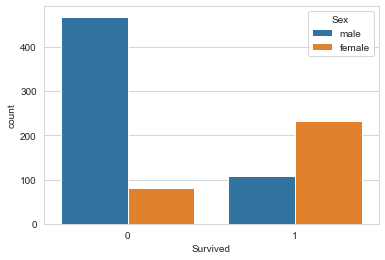

In [38]:
# Notice that most of the ppl that did not survive were males, while almost for every male that survived 2 females survived.
sns.countplot(x='Survived',hue='Sex',data=train)

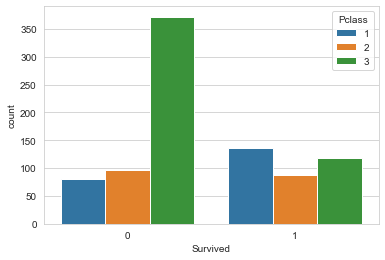

In [39]:
# Notice that most of the passengers that did not survive were in the 3rd class.
sns.countplot(x='Survived',hue='Pclass',data=train)

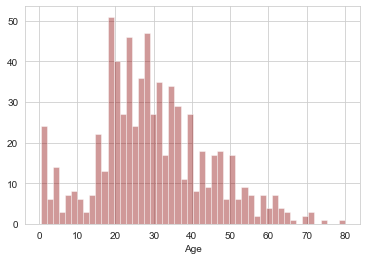

In [40]:
# Notice we drop the missing values before plotting the age.
# Here we can see that most of the titanic passengers were youth.
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=50)

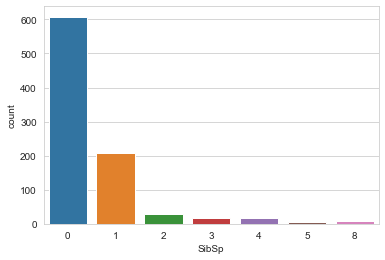

In [41]:
# Almost 70% of the passengers had no siblings or spouse.
# and almost the rest had 1 which was probably the spouse.
sns.countplot(x='SibSp',data=train)

Text(0.5, 0, 'Fare')

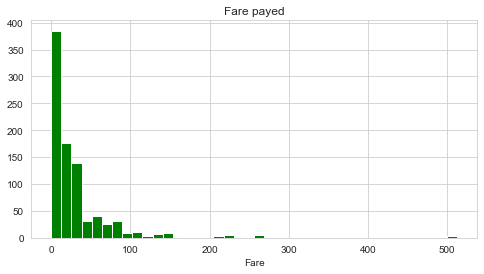

In [42]:
# Most of the train tickets were between 0-50 dollars which is obvious as most of the passengers were in the 3rd class.
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.title("Fare payed")
plt.xlabel("Fare")

# Data Preprocessing

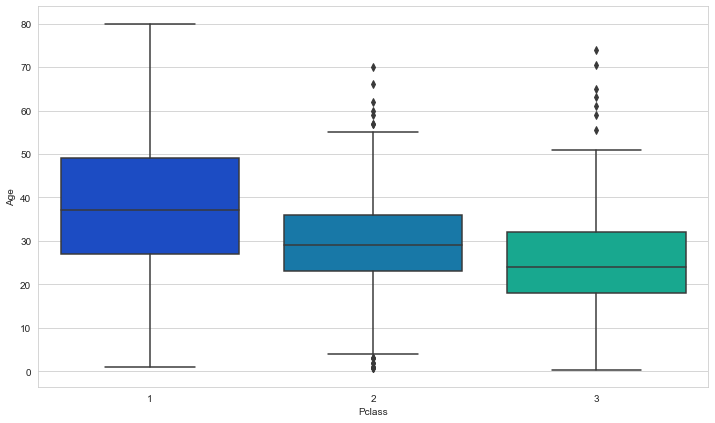

In [43]:
# Notice here the avg age of the first class passengers is higher than the other 2 classes.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [44]:
"""This method basically imputes for every Pclass if the age is null u give it a value of that class' avg."""
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return train[train["Pclass"] == 1]['Age'].mean()

        elif Pclass == 2:
            return train[train["Pclass"] == 2]['Age'].mean()

        else:
            return train[train["Pclass"] == 3]['Age'].mean()

    else:
        return Age

In [45]:
# Apply the impute function on every row of the 2 columns Age and Pclass.
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

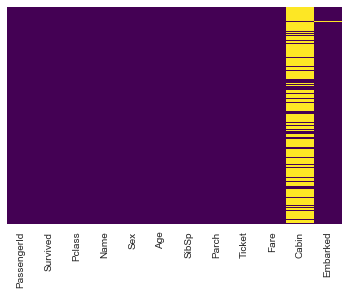

In [46]:
# Notice there is no more missing data in the age column as we imputed it.
# However for the Cabin data there is just way too many missing data so we cannot impute it we will have to remove it.
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
# Dropping every row of the cabin column.
train.drop('Cabin',axis=1,inplace=True)

In [48]:
# Dropping the null values in the embarked column.
train.dropna(inplace=True)

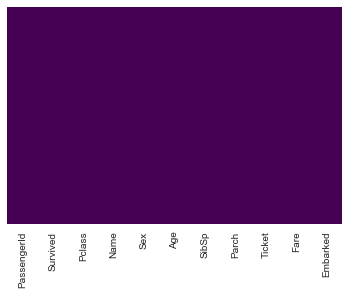

In [49]:
# Now our data has no more null values in it.
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Converting categorical features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [50]:
# As for the Name, Ticket we will just drop these and we will convert embarked and sex.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [51]:
# We use drop_first to remove repetitive answers. meaning that if male column is 0 this means that the person is a female.
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [52]:
# Dropping all rows for each of those columns from our train dataset.
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [53]:
# concatinating all the rows for each of these columns together.
train = pd.concat([train,sex,embark],axis=1)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now all of our data is numerical so it could be used in our machine learning model!

# Building a Logistic Regression model

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# X being the features used to predict, y being the feature that we want to predict.
# We are only using this on the train data given by kaggle we could've compined the train, test datasets but 
# it would've taken longer time, cuz we would've needed to clean the test data too.
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], 
                                                    test_size=0.30, random_state=101)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
# Build a logistic regression model and train it.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\aly\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
# Predicting values on the test part of our dataset with out knowing the true answer of them.
predictions = logmodel.predict(X_test)

# Model Evaluation

In [60]:
from sklearn.metrics import classification_report

Precision is the ability of a classifier not to label an instance positive that is actually negative. 
Precision = TP/(TP + FP)

Recall is the ability of a classifier to find all positive instances
Recall = TP/(TP+FN)
Fraction of positives that were correctly identified.

The F1 score is the mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.66      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [62]:
# We predicted 218 correctly, and 49 wrongly, out of the test set.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 35,  69]], dtype=int64)